In [1]:
import numpy as np
import pandas as pd
import plotnine as p9

In [2]:
avocado = pd.read_csv("avocado-updated-2020.csv")
# print(avocado.head())

print(avocado.describe())

print(avocado.columns)

       average_price  total_volume          4046          4225          4770  \
count   33045.000000  3.304500e+04  3.304500e+04  3.304500e+04  3.304500e+04   
mean        1.379941  9.683997e+05  3.023914e+05  2.797693e+05  2.148255e+04   
std         0.378972  3.934533e+06  1.301026e+06  1.151052e+06  1.001607e+05   
min         0.440000  8.456000e+01  0.000000e+00  0.000000e+00  0.000000e+00   
25%         1.100000  1.511895e+04  7.673100e+02  2.712470e+03  0.000000e+00   
50%         1.350000  1.291170e+05  1.099477e+04  2.343600e+04  1.780900e+02   
75%         1.620000  5.058285e+05  1.190219e+05  1.352389e+05  5.096530e+03   
max         3.250000  6.371614e+07  2.274362e+07  2.047057e+07  2.546439e+06   

         total_bags    small_bags    large_bags   xlarge_bags          year  
count  3.304500e+04  3.304500e+04  3.304500e+04  3.304500e+04  33045.000000  
mean   3.646735e+05  2.501980e+05  1.067329e+05  7.742585e+03   2017.460887  
std    1.564004e+06  1.037734e+06  5.167226e+

# 1. Briefly describe the data set. What information does it contain?

| Column Name | Description |
| :--- | :--- |
| **`date`** | The date of the weekly scan. |
| **`average_price`** | The average price of a single avocado. |
| **`total_volume`** | Total number of avocados sold (units). |
| **`4046`** | Volume of **Small/Medium** Hass avocados sold (PLU 4046). |
| **`4225`** | Volume of **Large** Hass avocados sold (PLU 4225). |
| **`4770`** | Volume of **Extra Large** Hass avocados sold (PLU 4770). |
| **`total_bags`** | Total number of bags sold (sum of small, large, xlarge). |
| **`small_bags`** | Volume of small bags sold. |
| **`large_bags`** | Volume of large bags sold. |
| **`xlarge_bags`** | Volume of extra large bags sold. |
| **`type`** | The type of avocado: **conventional** or **organic**. |
| **`year`** | The year of the observation (2015-2020). |
| **`geography`** | The specific geographical region where sales occurred. |

In [3]:
# avocado.dtypes

# 2. Clean the data in any way you see fit.


In [4]:
avocado_clean = avocado.copy()

# convert Date to date type
avocado_clean['date'] = pd.to_datetime(avocado_clean['date'])

# print(avocado_clean)

In [5]:
# rename columns
avocado_clean = avocado_clean.rename(columns={
    '4046': 'small_hass_volume',
    '4225': 'large_hass_volume',
    '4770': 'xl_hass_volume',
    'geography': 'region'
})

# print(avocado_clean)

In [6]:
# Original regions
all_regions = avocado['geography'].unique()
print(f"Total distinct geographical regions (raw data): {all_regions}")

Total distinct geographical regions (raw data): ['Albany' 'Atlanta' 'Baltimore/Washington' 'Boise' 'Boston'
 'Buffalo/Rochester' 'California' 'Charlotte' 'Chicago'
 'Cincinnati/Dayton' 'Columbus' 'Dallas/Ft. Worth' 'Denver' 'Detroit'
 'Grand Rapids' 'Great Lakes' 'Harrisburg/Scranton' 'Hartford/Springfield'
 'Houston' 'Indianapolis' 'Jacksonville' 'Las Vegas' 'Los Angeles'
 'Louisville' 'Miami/Ft. Lauderdale' 'Midsouth' 'Nashville'
 'New Orleans/Mobile' 'New York' 'Northeast' 'Northern New England'
 'Orlando' 'Philadelphia' 'Phoenix/Tucson' 'Pittsburgh' 'Plains'
 'Portland' 'Raleigh/Greensboro' 'Richmond/Norfolk' 'Roanoke' 'Sacramento'
 'San Diego' 'San Francisco' 'Seattle' 'South Carolina' 'South Central'
 'Southeast' 'Spokane' 'St. Louis' 'Syracuse' 'Tampa' 'Total U.S.' 'West'
 'West Tex/New Mexico']


In [7]:
# Geograpgical region handling
major_aggregates = [
    'Total U.S.', 'West', 'South', 'Northeast', 'Midsouth', 'Southeast',
    'GreatLakes', 'Plains', 'SouthCentral', 'California' # 'California' is an aggregate in this context
]

# Filter the dataset to include ONLY the individual selling regions (metro/state level)
avocado_clean = avocado_clean[~avocado_clean['region'].isin(major_aggregates)]

# print(avocado_clean)

In [8]:
# Cleaned regions
all_regions = avocado_clean['region'].unique()
print(f"Total distinct geographical regions (clean data): {all_regions}")

Total distinct geographical regions (clean data): ['Albany' 'Atlanta' 'Baltimore/Washington' 'Boise' 'Boston'
 'Buffalo/Rochester' 'Charlotte' 'Chicago' 'Cincinnati/Dayton' 'Columbus'
 'Dallas/Ft. Worth' 'Denver' 'Detroit' 'Grand Rapids' 'Great Lakes'
 'Harrisburg/Scranton' 'Hartford/Springfield' 'Houston' 'Indianapolis'
 'Jacksonville' 'Las Vegas' 'Los Angeles' 'Louisville'
 'Miami/Ft. Lauderdale' 'Nashville' 'New Orleans/Mobile' 'New York'
 'Northern New England' 'Orlando' 'Philadelphia' 'Phoenix/Tucson'
 'Pittsburgh' 'Portland' 'Raleigh/Greensboro' 'Richmond/Norfolk' 'Roanoke'
 'Sacramento' 'San Diego' 'San Francisco' 'Seattle' 'South Carolina'
 'South Central' 'Spokane' 'St. Louis' 'Syracuse' 'Tampa'
 'West Tex/New Mexico']


# 3. Which major geographical region sold the most total organic, small Hass avocados in 2017?



In [9]:
q3_filtered = avocado_clean[
    (avocado_clean['type'] == 'organic') & (avocado_clean['year'] == 2017)
]

# print(q3_filtered)

In [10]:
q3_results = q3_filtered.groupby('region')['small_hass_volume'].sum().sort_values(ascending=False)
q3_answer = q3_results.index[0]
q3_volume = q3_results.iloc[0]

# print(q3_results)
print(q3_answer)
print(q3_volume)


South Central
1717104.19


# 4. Split the date variable into month, day, and year variables. In which month is the highest average volume of avocado sales?

In [11]:
avocado_clean['month'] = avocado_clean['date'].dt.month
avocado_clean['day'] = avocado_clean['date'].dt.day
avocado_clean['year'] = avocado_clean['date'].dt.year

# print(avocado_clean)

In [12]:
q4_results = avocado_clean.groupby('month')['total_volume'].mean().sort_values(ascending=False)
q4_answer = q4_results.index[0]
q4_average_volume = q4_results.iloc[0]

# print(q4_results)
print(q4_answer)
print(q4_average_volume)

5
447827.25275807723


# 5. Which metro area geographical regions sold the most total avocados? Plot side-by-side box-plots of the total volume for only the five metro geographical regions with the highest averages for the total_volume variable.

In [13]:
q5_top5_by_avg = (
    avocado_clean.groupby('region', as_index=False)['total_volume']
    .mean()
    .sort_values('total_volume', ascending=False)
    .head(5)
    .rename(columns={'total_volume': 'avg_total_volume'})
)

top5_regions = q5_top5_by_avg['region'].tolist()
df_top5 = avocado_clean[avocado_clean['region'].isin(top5_regions)].copy()

# print(q5_top5_by_avg)
# print(df_top5)


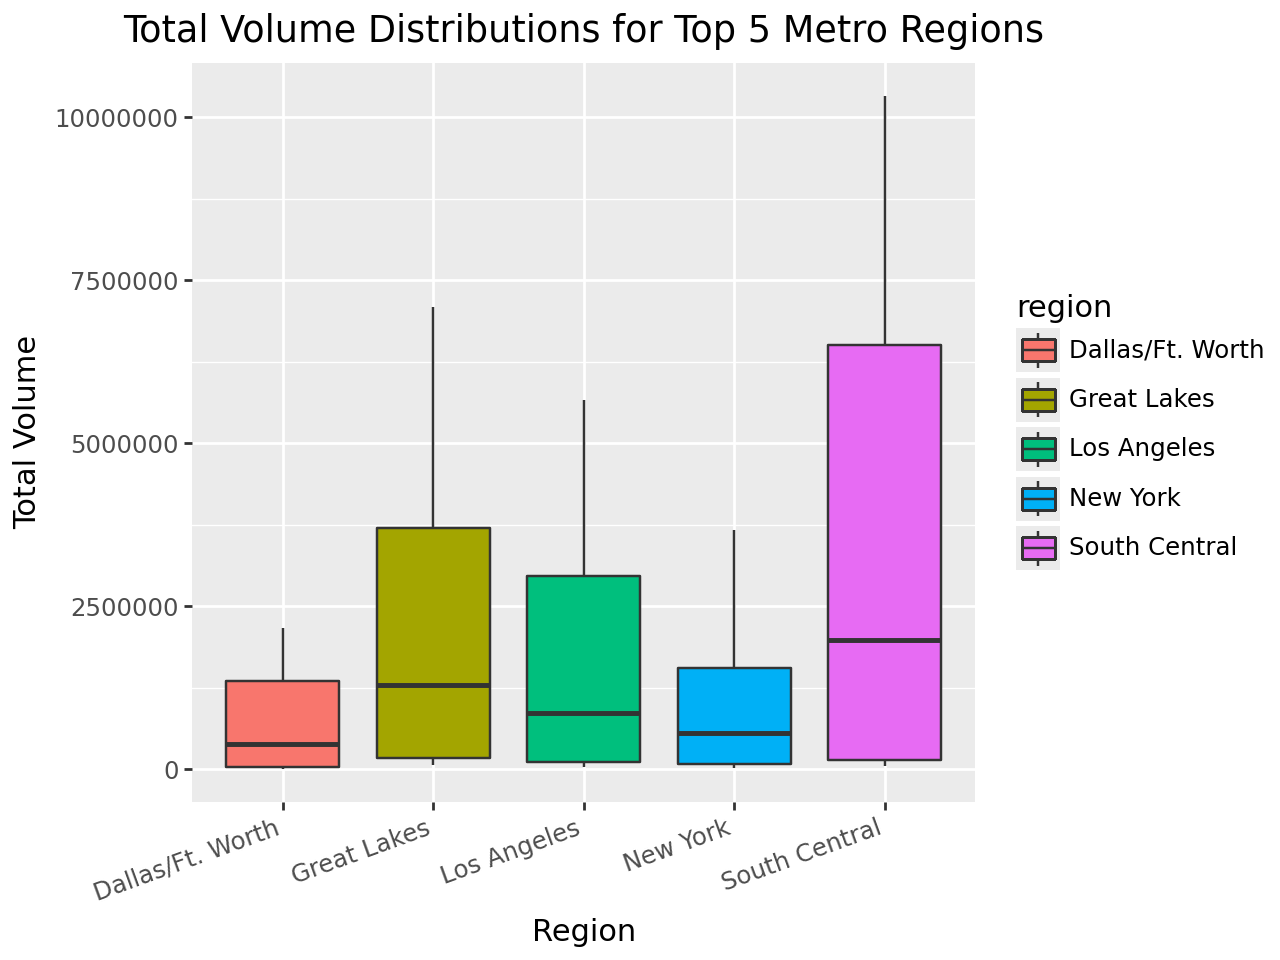

In [14]:
plot = (
    p9.ggplot(df_top5, p9.aes(x='region', y='total_volume', fill='region'))
    + p9.geom_boxplot()
    + p9.labs(
        title="Total Volume Distributions for Top 5 Metro Regions",
        x="Region",
        y="Total Volume"
    )
    + p9.theme(axis_text_x=p9.element_text(rotation=20, ha='right'))
)

plot.show()


# 6. From your cleaned data set, create a data set with only these California regions and answer the following questions about these California regions only.

In [15]:
california_regions = ['Los Angeles', 'San Diego', 'Sacramento', 'San Francisco']

ca_avocado = avocado_clean[avocado_clean['region'].isin(california_regions)]

# print(ca_avocado)

# 7. In which California regions is the price of organic versus conventional avocados most different? Support your answer with a few summary statistics AND a visualization.

In [16]:
q7_summary = ca_avocado.groupby(['region', 'type'])['average_price'].mean().unstack()

q7_summary['price_difference'] = np.abs(q7_summary['organic'] - q7_summary['conventional'])

most_different_region = q7_summary['price_difference'].idxmax()

print(q7_summary.sort_values(by='price_difference', ascending=False))
print(f"\nThe region with the greatest price difference is: {most_different_region}")

type           conventional   organic  price_difference
region                                                 
San Francisco      1.400490  2.119444          0.718954
San Diego          1.113856  1.798366          0.684510
Sacramento         1.295359  1.873856          0.578497
Los Angeles        1.047124  1.574902          0.527778

The region with the greatest price difference is: San Francisco


In [17]:
df_plot = q7_summary[['organic', 'conventional', 'price_difference']].reset_index()

df_plot = df_plot.sort_values('price_difference', ascending=False)
df_plot['region'] = pd.Categorical(df_plot['region'], categories=df_plot['region'], ordered=True)


print(df_plot)

type         region   organic  conventional  price_difference
3     San Francisco  2.119444      1.400490          0.718954
2         San Diego  1.798366      1.113856          0.684510
1        Sacramento  1.873856      1.295359          0.578497
0       Los Angeles  1.574902      1.047124          0.527778


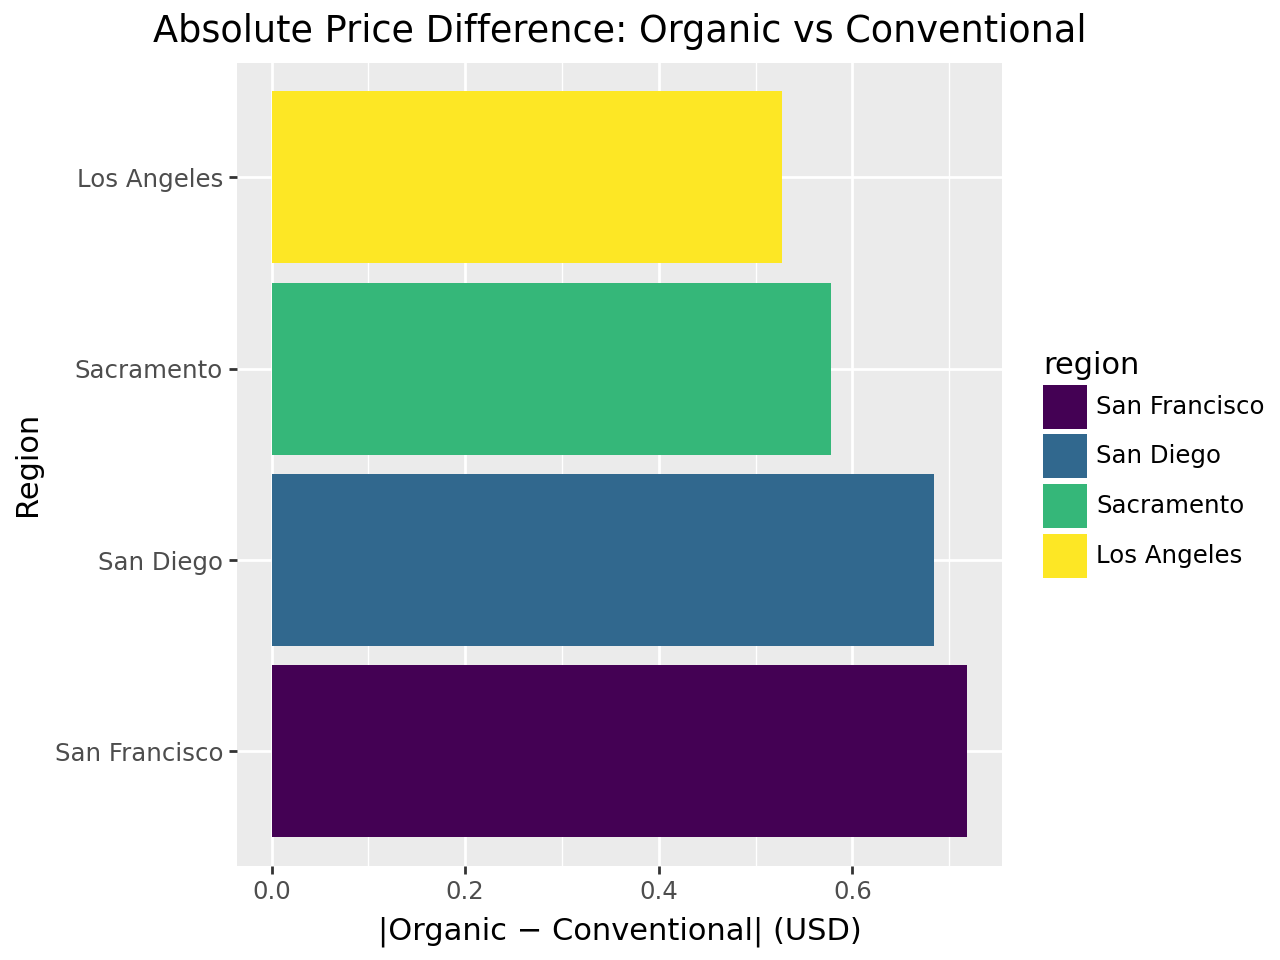

In [18]:
diff_bar = (
    p9.ggplot(df_plot, p9.aes(x='region', y='price_difference', fill = 'region'))
    + p9.geom_col()
    + p9.coord_flip()
    + p9.labs(
        title='Absolute Price Difference: Organic vs Conventional',
        x='Region',
        y='|Organic − Conventional| (USD)'
    )
)

diff_bar.show()


# 8. The following plot shows, for all four California regions, the proportion of the average Hass avocado sales that are small, large, or extra large; conventional vs. organic. Recreate the plot; you do not have to replicate the exact finishing touches - e.g., color, theme - but your plot should resemble the content of this plot.

In [19]:
# 1) Average the size volumes across time for each region × type
q8_avg = (
    ca_avocado
    .groupby(['region', 'type'], as_index=False)
    .agg(
        small=('small_hass_volume', 'mean'),
        large=('large_hass_volume', 'mean'),
        xlarge=('xl_hass_volume', 'mean')
    )
)

print(q8_avg)

          region          type         small          large        xlarge
0    Los Angeles  conventional  1.172952e+06  443842.308562  97073.643529
1    Los Angeles       organic  1.444206e+04   20804.220654      6.035294
2     Sacramento  conventional  1.412831e+05  243005.070163   6333.279673
3     Sacramento       organic  2.808893e+03    4282.693203      0.772680
4      San Diego  conventional  1.637928e+05  140106.101438  17963.543497
5      San Diego       organic  2.573068e+03    7273.784575      1.323595
6  San Francisco  conventional  2.158398e+05  449377.420359  14931.603235
7  San Francisco       organic  8.303041e+03   11350.098072      2.159346


In [20]:
# 2) Long format and proportions within region × type
q8_long = (
    q8_avg
    .melt(id_vars=['region','type'], value_vars=['small','large','xlarge'],
          var_name='size', value_name='avg_volume')
)
q8_long['prop'] = q8_long.groupby(['region','type'])['avg_volume'].transform(lambda s: s / s.sum())

# print(q8_long)

In [21]:
region_order = ['Los Angeles', 'Sacramento', 'San Diego', 'San Francisco']
size_order_fixed = ['xlarge', 'large', 'small']

q8_long['region'] = pd.Categorical(q8_long['region'], categories=region_order, ordered=True)
q8_long['size']   = pd.Categorical(q8_long['size'],   categories=size_order_fixed, ordered=True)

print(q8_long)

           region          type    size    avg_volume      prop
0     Los Angeles  conventional   small  1.172952e+06  0.684389
1     Los Angeles       organic   small  1.444206e+04  0.409677
2      Sacramento  conventional   small  1.412831e+05  0.361688
3      Sacramento       organic   small  2.808893e+03  0.396045
4       San Diego  conventional   small  1.637928e+05  0.508891
5       San Diego       organic   small  2.573068e+03  0.261274
6   San Francisco  conventional   small  2.158398e+05  0.317342
7   San Francisco       organic   small  8.303041e+03  0.422433
8     Los Angeles  conventional   large  4.438423e+05  0.258971
9     Los Angeles       organic   large  2.080422e+04  0.590152
10     Sacramento  conventional   large  2.430051e+05  0.622099
11     Sacramento       organic   large  4.282693e+03  0.603846
12      San Diego  conventional   large  1.401061e+05  0.435298
13      San Diego       organic   large  7.273785e+03  0.738592
14  San Francisco  conventional   large 

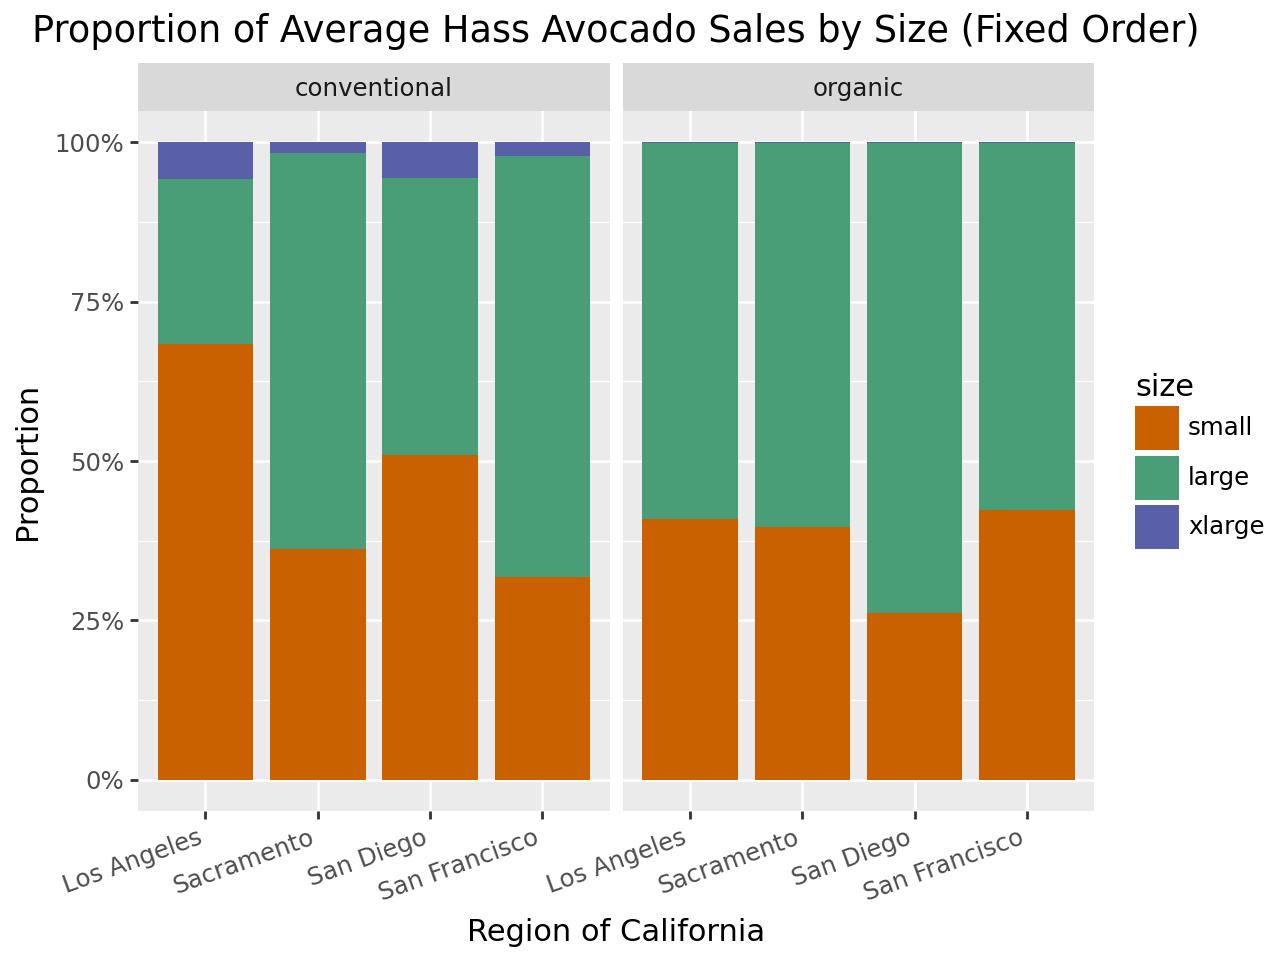

In [22]:
prop_plot = (
    p9.ggplot(q8_long, p9.aes(x='region', y='prop', fill='size'))
    + p9.geom_col(position='stack', width=0.85)
    + p9.facet_wrap('~ type', ncol=2)
    + p9.scale_y_continuous(
        labels=lambda l: [f'{v*100:.0f}%' for v in l],
        limits=[0, 1]
    )
    + p9.scale_fill_manual(
        values={
            'xlarge': '#5a60a7',   # blue
            'large':  '#499e77',   # green
            'small':  '#ca6101'    # terracotta
        },
        breaks=['small','large','xlarge']  # legend order
    )
    + p9.labs(
        title='Proportion of Average Hass Avocado Sales by Size (Fixed Order)',
        x='Region of California',
        y='Proportion'
    )
    + p9.theme(axis_text_x=p9.element_text(rotation=20, ha='right'))
)

prop_plot.show()

# Using Outside Data


In [23]:
url = "https://files.zillowstatic.com/research/public_csvs/zhvi/City_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv"

zillow_city = pd.read_csv(url)

print(zillow_city.shape)
print(zillow_city.columns)
# print(zillow_city.head())

(21474, 316)
Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       'State', 'Metro', 'CountyName', '2000-01-31', '2000-02-29',
       ...
       '2024-11-30', '2024-12-31', '2025-01-31', '2025-02-28', '2025-03-31',
       '2025-04-30', '2025-05-31', '2025-06-30', '2025-07-31', '2025-08-31'],
      dtype='object', length=316)


In [24]:
# Month start (YYYY-MM)
ca_avocado['month'] = ca_avocado['date'].values.astype('datetime64[M]')

ca_monthly = (
    ca_avocado
    .groupby(['region','type','month'], as_index=False)
    .agg(
        avg_price=('average_price','mean'),
        total_volume=('total_volume','sum')
    )
)

# print(ca_monthly)

<positron-console-cell-24>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [25]:
# Keep only CA cities of interest
wanted = ['Los Angeles','San Diego','Sacramento','San Francisco']
zillow_ca = zillow_city[(zillow_city['StateName'] == 'CA') & (zillow_city['RegionName'].isin(wanted))]

# Identify date columns (Zillow uses YYYY-MM or YYYY-MM-DD headers depending on version)
non_date_cols = {'RegionID','RegionName','City','StateName','Metro','CountyName','SizeRank'}
date_cols = [c for c in zillow_ca.columns if c not in non_date_cols and c not in {'State','StateCodeFIPS','MunicipalCodeFIPS'}]


In [26]:
# Melt wide→long
zillow_long = (
    zillow_ca
    .melt(id_vars=[c for c in zillow_ca.columns if c not in date_cols],
          value_vars=date_cols,
          var_name='month_str', value_name='home_value')
)


In [27]:
# Some Zillow files have "YYYY-MM" column names; others "YYYY-MM-01". Both are handled.
zillow_long['month'] = pd.to_datetime(zillow_long['month_str'], errors='coerce')
# Normalize to month-start
zillow_long['month'] = zillow_long['month'].values.astype('datetime64[M]')

# Keep only columns we need and rename to align
home = zillow_long[['RegionName','month','home_value']].rename(columns={'RegionName':'region'})


<positron-console-cell-27>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.


In [28]:
# --- 3) Join avocado (monthly) with housing (monthly) ---
# Note: housing has no 'type' dimension; avocado does. The join repeats housing across types.
joined = (
    ca_monthly
    .merge(home, on=['region','month'], how='inner')
    .dropna(subset=['home_value'])
)

print("Joined shape:", joined.shape)
print(joined.head())

Joined shape: (568, 6)
        region          type      month  avg_price  total_volume  \
0  Los Angeles  conventional 2015-01-01     0.8875   10526526.34   
1  Los Angeles  conventional 2015-02-01     0.8250   12554123.17   
2  Los Angeles  conventional 2015-03-01     0.9120   13615707.63   
3  Los Angeles  conventional 2015-04-01     0.9725   10659674.01   
4  Los Angeles  conventional 2015-05-01     0.8720   16177747.00   

      home_value  
0  515125.421594  
1  516821.008514  
2  516212.911658  
3  515644.420761  
4  515816.318639  


In [29]:
region_summ = (
    joined.groupby(['region','type'], as_index=False)
    .agg(
        mean_home_value=('home_value','mean'),
        mean_price=('avg_price','mean'),
        mean_volume=('total_volume','mean')
    )
    .sort_values(['type','mean_home_value'], ascending=[True, False])
)
print("\nRegion x Type summary (means):\n", region_summ)


Region x Type summary (means):
           region          type mean_home_value  mean_price   mean_volume
6  San Francisco  conventional  1208774.990456    1.407887  3.714133e+06
0    Los Angeles  conventional   614466.741378    1.048077  1.307994e+07
4      San Diego  conventional   591922.106338    1.116000  2.364145e+06
2     Sacramento  conventional   316822.702552    1.299014  2.053233e+06
7  San Francisco       organic  1208774.990456    2.130739  1.480762e+05
1    Los Angeles       organic   614466.741378    1.576979  4.320424e+05
5      San Diego       organic   591922.106338    1.798423  8.324119e+04
3     Sacramento       organic   316822.702552    1.880824  4.917979e+04


In [30]:
region_summ.dtypes

region              object
type                object
mean_home_value     object
mean_price         float64
mean_volume        float64
dtype: object

In [31]:
for c in ["mean_home_value", "mean_price", "mean_volume"]:
    region_summ[c] = pd.to_numeric(region_summ[c], errors="coerce")

In [32]:
region_summ.dtypes

region              object
type                object
mean_home_value    float64
mean_price         float64
mean_volume        float64
dtype: object

In [33]:
df = joined.copy()
df = df.replace([np.inf, -np.inf], np.nan).dropna(subset=["home_value","avg_price","total_volume"])
df = df[(df["home_value"]>0) & (df["avg_price"]>0) & (df["total_volume"]>0)]


<positron-console-cell-33>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`


In [34]:
# Log transforms
df["ln_home"] = np.log(df["home_value"])
df["ln_price"] = np.log(df["avg_price"])
df["ln_vol"]   = np.log(df["total_volume"])

corr_tbl = (
    df.groupby(["region","type"], as_index=False)
      .apply(lambda g: pd.Series({
          "corr_home_price": g["home_value"].corr(g["avg_price"]),
          "corr_home_volume": g["home_value"].corr(g["total_volume"])
      }))
      .reset_index(drop=True)
)

print("\nCorrelations by region × type:")
print(corr_tbl.round(3))


Correlations by region × type:
          region          type  corr_home_price  corr_home_volume
0    Los Angeles  conventional            0.462             0.133
1    Los Angeles       organic            0.517             0.644
2     Sacramento  conventional            0.258             0.383
3     Sacramento       organic           -0.150             0.568
4      San Diego  conventional            0.387             0.247
5      San Diego       organic            0.409             0.727
6  San Francisco  conventional            0.074             0.406
7  San Francisco       organic           -0.091             0.628


<positron-console-cell-34>:8: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.


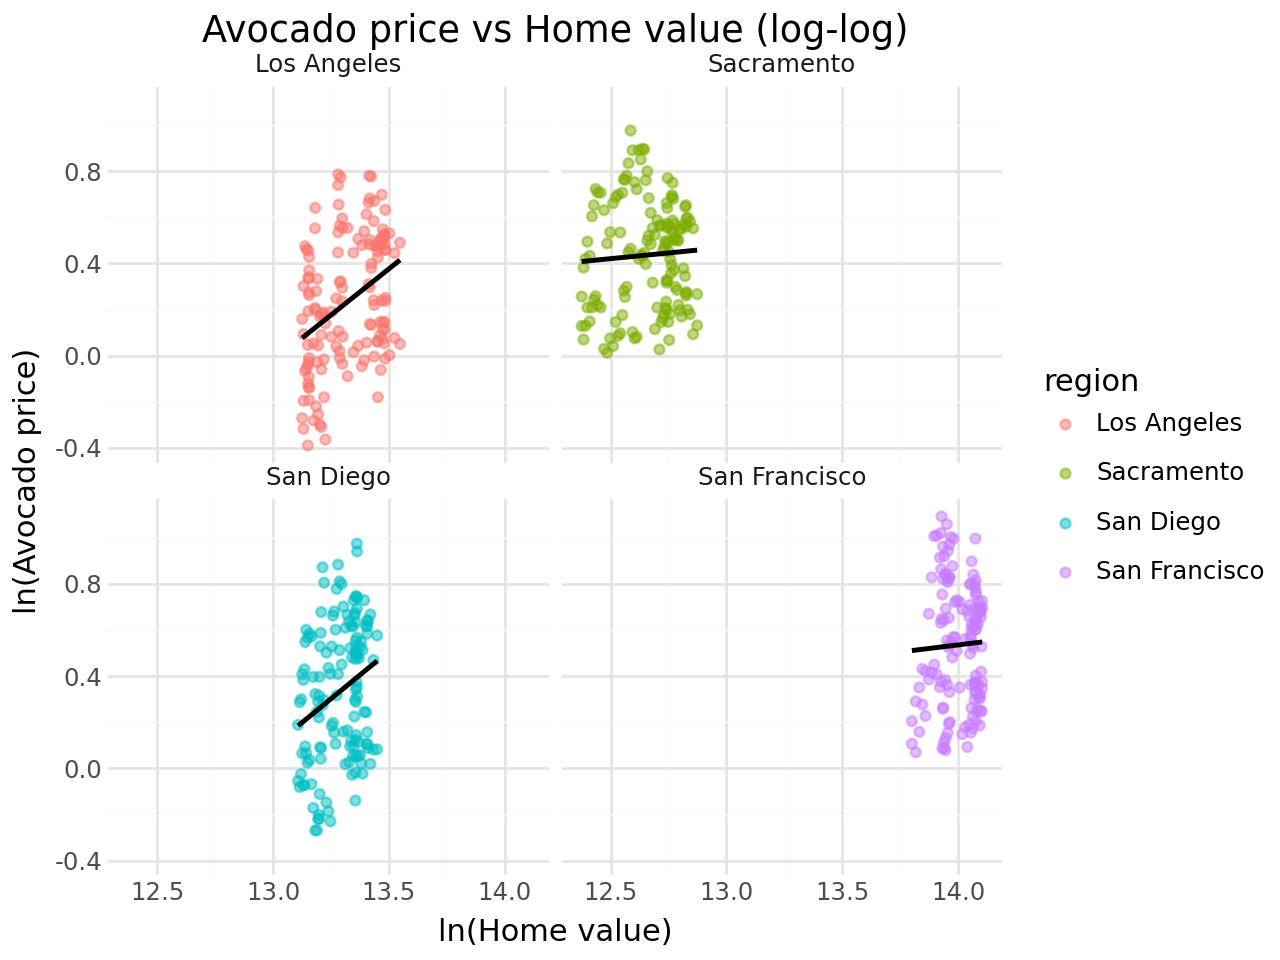

In [35]:
plot1 = (
    p9.ggplot(df, p9.aes(x="ln_home", y="ln_price", color="region")) +
    p9.geom_point(alpha=0.5) +
    p9.geom_smooth(method="lm", se=False, color="black") +
    p9.facet_wrap("~region") +
    p9.labs(
        title="Avocado price vs Home value (log-log)",
        x="ln(Home value)", y="ln(Avocado price)"
    ) +
    p9.theme_minimal()
)

plot1.show()

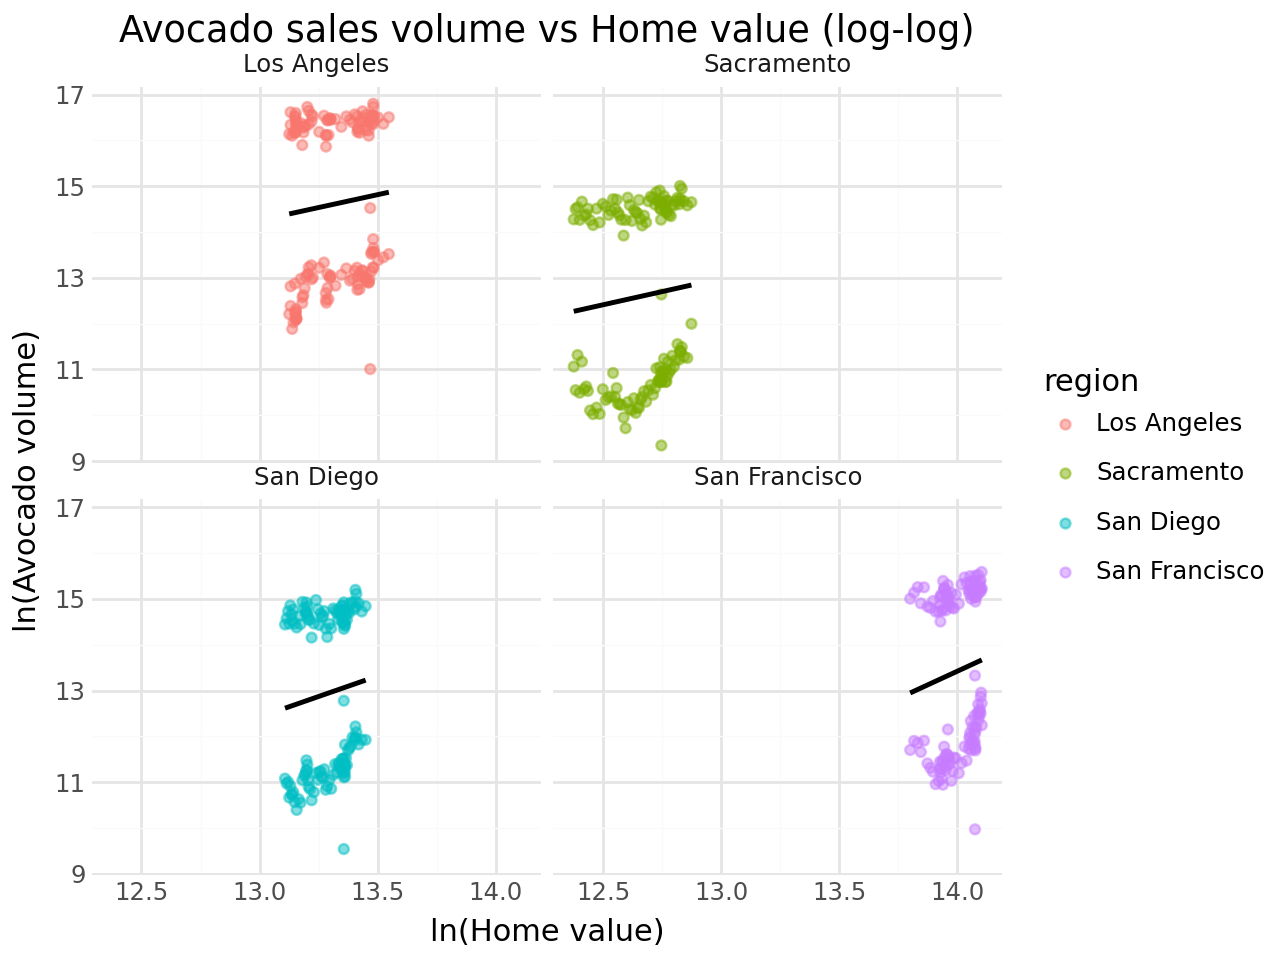

In [36]:
plot2 = (
    p9.ggplot(df, p9.aes(x="ln_home", y="ln_vol", color="region")) +
    p9.geom_point(alpha=0.5) +
    p9.geom_smooth(method="lm", se=False, color="black") +
    p9.facet_wrap("~region") +
    p9.labs(
        title="Avocado sales volume vs Home value (log-log)",
        x="ln(Home value)", y="ln(Avocado volume)"
    ) +
    p9.theme_minimal()
)

plot2.show()